In [ ]:
#the statistics of the eclipse data

In [337]:
import pandas as pd
import os
import json
import csv
from flatten_json import flatten
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from lifelines import KaplanMeierFitter

In [338]:
def keepVal(activity):
    if activity=='NEW'or activity=='FIXED':
        return 1
    return 0

In [339]:
#keep only changes in status
def keep(value,status):
    if status!='Resolution':
        return 1
    if value=='---':
        return 0
    return 1



In [340]:
#return the activity
def return_val(x):
    if x['What']=='Status':
        if x['Added']=='ASSIGNED':
            return 'Assignee'
        return x['Added']
        
    if x['What']=='Assignee':
        return x['What']
    if x['What']=='Resolution':
        return x['Added']
    

In [341]:
df=pd.read_csv('db\\ECF.csv')

In [342]:
dfu=df
dfg=df

In [343]:

df['creation_ts'] = pd.to_datetime(df['creation_ts'])
df['When'] = pd.to_datetime(df['When'])

In [344]:
dict1={
  "4.2" : "2012-6-27 00:00:00" ,  
"4.3" : "2013-6-26 20:00:00" ,
"4.4" :  "2014-6-25 12:15:00" ,
"4.5" : "2015-6-24 20:00:00" ,
"4.6" :"2016-6-22 11:00:00",
"4.7" :  "2017-6-28 09:50:00",
"4.8" :  "2018-6-27 00:00:00"

}

In [345]:
arr=[
    "4.3" ,
"4.4" ,
"4.5" ,
"4.6"  ,
"4.7",
"4.8",
 "4.9"   
]
dates=[
    "26-6-2013 20:00:00" ,
 "25-6-2014 12:15:00" ,
 "24-6-2015 20:00:00" ,
"22-6-2016 11:00:00",
  "28-6-2017 09:50:00",
  "27-6-2018 00:00:00",
 "27-6-2019 00:00:00"
]
Bdates=[
    "22-6-2011 20:00:00" ,
    "27-6-2012 00:00:00",
    "26-6-2013 20:00:00" ,
 "25-6-2014 12:15:00" ,
 "24-6-2015 20:00:00" ,
"22-6-2016 11:00:00",
  "28-6-2017 09:50:00",
  "27-6-2018 00:00:00",
]

In [346]:
arr1=[
    4.2 ,
    4.3 ,
4.4 ,
4.5 ,
4.6  ,
4.7,
4.8 
]

In [347]:
#g=df.drop_duplicates('bug_id', keep='first')

In [348]:
#ss=g.version.str.contains('^4.2', regex=True)
#ss.value_counts()

In [490]:
#get the total number of bugs reported and resolved in each version 

gData=pd.DataFrame()
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    #version.str.contains(version, regex=True)
    versionD= x
    version='^'+versionD
    mask= (df.version.str.contains(version, regex=True))  
    #the bug before release 
    maskp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] < start_date)
    #the bug after release 
    maskpp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= start_date)
    mask3 =   (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity'])
    dff = df.loc[mask]
    dffp = df.loc[maskp]
    dffpp = df.loc[maskpp]
    dff1 = df.loc[mask3]
    id_before_release=dffp.bug_id.unique()
    id_after_release=dffpp.bug_id.unique()
    id_resolved=dff1.bug_id.unique()
    TOTAL=len(dff.bug_id.unique())
    before_release=len(dffp.bug_id.unique())
    after_release=len(dffpp.bug_id.unique())
    res=len(dff1.bug_id.unique())
    data=pd.DataFrame({"version": [versionD] , "total":[ TOTAL] ,'before_release':[before_release], 
                       'after_release':[after_release],'resolved':[res]
   })
    

    gData=gData.append(data)

In [491]:
gData

,version,total,before_release,after_release,resolved
0,4.2,4371,1800,2571,2681
0,4.3,3502,1881,1621,2418
0,4.4,4363,2813,1550,3029
0,4.5,2935,1522,1413,1899
0,4.6,2914,1504,1410,1999
0,4.7,3405,2013,1392,2550
0,4.8,2168,1795,373,1561


In [352]:

# of reported bugs before release =RBBR
# of reported bugs after release =RBAR
# of reported and  resolved bugs before release =RBRB
# of reported and fixed bugs before release =RBFB
# of reported  before release and  resolved after release =RBRA
# of reported  before release and  fixed after release =RBFA
# of reported after release and  resolved after release =RARA
# of reported  after release and fixed after release =RAFA

In [607]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c=0
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    #version.str.contains(version, regex=True)
    versionD= x
    version='^'+versionD
   # print(x,dict[x])
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
    mask= (df.version.str.contains(version, regex=True))  
    #the bug before release 
    maskp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] < start_date) & (df['creation_ts'] >= Bdates[c] )
    #the bug after release 
    maskpp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= start_date) & (df['creation_ts'] < dates[c] )

    #the bug created and resolved & before release 
    mask1 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (df['creation_ts'] >= Bdates[c] ) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) 
    #the bug created and fixed before release 
    mask2 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (df['creation_ts'] >= Bdates[c] ) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity'])  & ("FIXED"==df['resolution'])

    #the bug created before release and resolved  after release 
    mask3 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (df['creation_ts'] > Bdates[c] ) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity'])
    #the bug created before release and fixed after release 
    mask4 = (df['When'] > start_date) & (df['creation_ts'] <= start_date)  & (df['creation_ts'] > Bdates[c] ) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
    mask5 = (df['When'] > start_date) & (df['When'] < dates[c]) & (df['creation_ts'] >= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) 
    #the bug created after release  and fixed 
    mask6 = (df['When'] > start_date) & (df['When'] < dates[c]) & (df['creation_ts'] >= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

    c=c+1
    dff = df.loc[mask]
    dffp = df.loc[maskp]
    dffpp = df.loc[maskpp]
    dff1 = df.loc[mask1]
    dff2 = df.loc[mask2]
    dff3 = df.loc[mask3]
    dff4 = df.loc[mask4]
    dff5 = df.loc[mask5]
    dff6 = df.loc[mask6]
    id_before_release=dffp.bug_id.unique()
    id_after_release=dffpp.bug_id.unique()
    id_RBRB=dff1.bug_id.unique()
    id_RBFB=dff2.bug_id.unique()
    id_RBRA=dff3.bug_id.unique()
    id_RBFA=dff4.bug_id.unique()
    id_RARA=dff5.bug_id.unique()
    id_RAFA=dff6.bug_id.unique()
    
    TOTAL=len(dff.bug_id.unique())
    before_release=len(dffp.bug_id.unique())
    after_release=len(dffpp.bug_id.unique())
    RBRB=len(dff1.bug_id.unique())
    RBFB=len(dff2.bug_id.unique())
    RBRA=len(dff3.bug_id.unique())
    RBFA=len(dff4.bug_id.unique())
    RARA=len(dff5.bug_id.unique())
    RAFA=len(dff6.bug_id.unique())
    if before_release!=0 and RBRB!=0:
        ratio1=RBRB/before_release
        ratio2=RBFB/RBRB
    if after_release!=0 and RARA!=0:
        ratio3=RARA/after_release
        ratio4=RAFA/RARA
    data=pd.DataFrame({"version": [versionD] , "total":[ TOTAL] ,'before_release':[before_release], 
                       'after_release':[after_release], 'RBRB':[RBRB]
   , 'RBFB':[RBFB]
   , 'RBRA':[RBRA]
   ,'RBFA':[RBFA]
   , 'RARA':[RARA]
   , 'RAFA':[RAFA]
            , 'Ratio_R_B':[ratio1]           , 'Ratio_F_B':[ratio2]
                       , 'Ratio_R_A':[ratio3]           , 'Ratio_F_A':[ratio4]
   })
    

    tData=tData.append(data)

In [608]:
tData=tData[['version','total','before_release','after_release','RBRB','RBFB','RBRA','RBFA','RARA','RAFA', 'Ratio_R_B', 'Ratio_F_B', 'Ratio_R_A'    , 'Ratio_F_A']]

In [609]:
tData

,version,total,before_release,after_release,RBRB,RBFB,RBRA,RBFA,RARA,RAFA,Ratio_R_B,Ratio_F_B,Ratio_R_A,Ratio_F_A
0,4.2,4371,1757,2209,853,609,309,189,1065,726,0.485487,0.713951,0.482119,0.681690
0,4.3,3502,1857,1379,1048,786,360,246,739,495,0.564351,0.750000,0.535896,0.669824
0,4.4,4363,2782,1264,1703,1272,389,241,630,375,0.612150,0.746917,0.498418,0.595238
0,4.5,2935,1512,1129,758,523,243,166,539,398,0.501323,0.689974,0.477414,0.738404
0,4.6,2914,1487,1245,826,681,268,198,725,562,0.555481,0.824455,0.582329,0.775172
0,4.7,3405,1973,1321,1301,1082,247,191,908,709,0.659402,0.831668,0.687358,0.780837
0,4.8,2168,1709,373,1195,1027,120,97,208,139,0.699239,0.859414,0.557641,0.668269


In [507]:
tData.to_csv('RQ1\\rates1.csv',index=False)

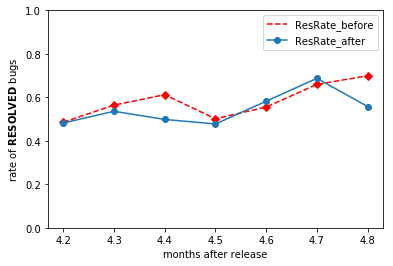

In [602]:

data = pd.read_csv('RQ1\\rates1.csv')
#print(data)
ci=0
#colors=['red','green','blue','black','orange','pink']
style=['-','--']
ax = plt.gca()
data.plot(kind='line',x='version',y='Ratio_R_B',style='--', color='red',ax=ax, marker="D",label='ResRate_before')
ax = plt.gca()
data.plot(kind='line',x='version',y='Ratio_R_A',style='-',ax=ax, marker='o',label='ResRate_after')
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'RESOLVED' +  "}"+ "}$" + ' bugs')
plt.ylim(0,1)
#plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.savefig('Rrates1.pdf')
plt.show()

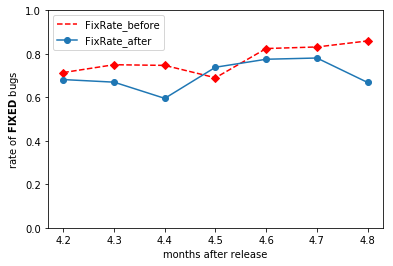

In [603]:
data = pd.read_csv('RQ1\\rates1.csv')
#print(data)
ci=0
#colors=['red','green','blue','black','orange','pink']
style=['-','--']
ax = plt.gca()
data.plot(kind='line',x='version',y='Ratio_F_B',style='--', color='red',ax=ax, marker="D",label='FixRate_before')
ax = plt.gca()
data.plot(kind='line',x='version',y='Ratio_F_A',style='-',ax=ax, marker='o',label='FixRate_after')
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'FIXED' +  "}"+ "}$" + ' bugs')

plt.ylim(0,1)
#plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.savefig('Frates1.pdf')
plt.show()

In [118]:
allD=pd.DataFrame()

In [119]:
allD['version']=tData['version']
allD['Total_before_release']=tData['before_release']
allD['Total_after_release']=tData['after_release']
allD['Ratio_Resolved_before']=tData['Ratio_R_B']
allD['Ratio_Fixed_before']=tData['Ratio_F_B']
allD['Ratio_Resolved_after']=tData['Ratio_R_A']
allD['Ratio_Fixed_after']=tData['Ratio_F_A']


In [282]:
#allD

In [572]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c=0
for x in dict1:
    data=pd.DataFrame()
    data1=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = '25-09-2014 12:00:00'
    versionD= x
    version='^'+versionD
    date_time_obj = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    rem=[619]

          
    #the bug before release 
    mask8 = (df.version.str.contains(version, regex=True)) & (df['creation_ts'] > Bdates[c] ) & (df['creation_ts'] <= start_date)  & ((("RESOLVED"==df['activity']) & (df['When'] >start_date )) |  (df['resolution'].isnull()))

         
     
    dff8 = df.loc[mask8]
 
    BRA=len(dff8.bug_id.unique())
    c=c+1

            #print(after_release,ratio5)
    data=pd.DataFrame({"version": [versionD] , 
                       "nbra": [BRA]
   })
            
    

    tData=tData.append(data)
    

In [573]:
colu=tData['nbra'].tolist()

In [574]:
colu

[590, 565, 771, 569, 463, 447, 291]

In [510]:
colu

[619, 580, 784, 576, 479, 469, 333]

In [575]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
m=0
for x in dict1:
    data=pd.DataFrame()
    data1=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = '25-09-2014 12:00:00'
    versionD= x
    version='^'+versionD
    date_time_obj = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    rem=[colu[m]]
    m=m+1
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
           # mask= (df.version.str.contains(version, regex=True))  
     #the bug before release 
            mask8 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] <= start_date)  & ((("RESOLVED"==df['activity']) & (df['When'] >start_date )) |  (df['resolution'].isnull()))

    #the bug after release 
            maskpp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)

 
    #the bug created after release  and resolved
            mask5 = (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
            mask7 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >l )) |  (df['resolution'].isnull()))

         
            dffpp = df.loc[maskpp]
            dff5 = df.loc[mask5]
            dff7 = df.loc[mask7]
            dff8 = df.loc[mask8]
         
            id_after_release=dffpp.bug_id.unique()
     
            id_RARA=dff5.bug_id.unique()
          
            id_RANRA=dff7.bug_id.unique()
    
            #TOTAL=len(dff.bug_id.unique())
            
            after_release=len(dffpp.bug_id.unique())
        
           # RBFA=len(dff4.bug_id.unique())
            RARA=len(dff5.bug_id.unique())
            BRA=len(dff8.bug_id.unique())
      
            RANRA=len(dff7.bug_id.unique())
        
            if after_release!=0 and RARA!=0:
                    ratio5=RARA/(after_release+rem[i])
            rem.insert(i+1, after_release+rem[i]-RARA) 
            #print(after_release,ratio5)
            data=pd.DataFrame({"version": [versionD] , 
                       'reported_bugs':[after_release],
    'RARA':[RARA]
             , 'Ratio_R_A':[ratio5], "month":i+1 , "nbra": [BRA]
   })
            data1=pd.DataFrame({"version": [versionD] , "ids": [id_RARA]} )
    

            tData=tData.append(data)
    

In [569]:
#tData

In [563]:
#tData
tData.to_csv('RQ1\\Aevol1.csv',index=False)

In [564]:
#data = pd.read_csv('RQ1\\evol1.csv')

In [565]:
#data

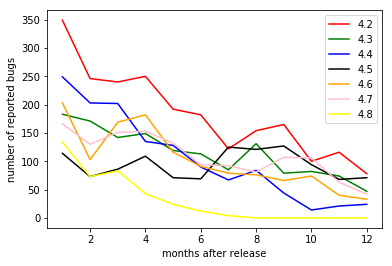

In [567]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\Aevol1.csv')
ci=0
colors=['red','green','blue','black','orange','pink','yellow']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    #print(value['reported_bugs'])
    value.plot(kind='line',x='month',y='reported_bugs', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('number of reported bugs')
#plt.ylim(0,1)
#plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.savefig('rq1B(r).pdf')
plt.show()


In [570]:
#resolved after

tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
rem=[0]
c=-1
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = '25-09-2014 12:00:00'
    version= x
    date_time_obj = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    temp=rem[-1]
    #print(temp)
    rem= [temp]
   
    c=c+1
   # print(c)
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
   # print(x,dict[x])
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
            mask= (version==df['version'])  
    #the bug before release 
            maskp = (version==df['version'])  & (df['creation_ts'] < start_date) 
    #the bug after release 
            maskpp = (arr[c]!=df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)



            mask4 = (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l )& ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
            mask5 = (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
            mask7 = (arr[c]!=df['version'])  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >=l )) |  (df['resolution'].isnull()))
   
    #the bug created after release  and fixed 
            mask6 = (df['creation_ts'] >= start_date) & (version==df['version']) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

            dff = df.loc[mask]
            dffp = df.loc[maskp]
            dffpp = df.loc[maskpp]
            dff1 = df.loc[mask1]
            dff2 = df.loc[mask2]
            dff3 = df.loc[mask3]
            dff4 = df.loc[mask4]
            dff5 = df.loc[mask5]
    
            id_R=len(dff5.bug_id.unique())
            id_F=len(dff4.bug_id.unique())
            
            id_before_release=dffp.bug_id.unique()
            id_after_release=dffpp.bug_id.unique()
            id_RBRB=dff1.bug_id.unique()
            id_RBFB=dff2.bug_id.unique()
            id_RBRA=dff3.bug_id.unique()
            id_RBFA=dff4.bug_id.unique()
            id_RARA=dff5.bug_id.unique()
            id_RAFA=dff6.bug_id.unique()
            id_RANRA=dff7.bug_id.unique()
    
       
            if after_release!=0 and RARA!=0:
                    ratio5=id_F/id_R
                    #print(rem[i],after_release,RARA)
            rem.insert(i+1, after_release+rem[i]-RARA) 
            #print(rem[i])
            data=pd.DataFrame({"version": [version] , 
    'RARA':[RARA]
             , 'Ratio_F':[ratio5], "month":i+1 
   })
    

            tData=tData.append(data)
    #break

In [571]:
#tData
tData.to_csv('RQ1\\Aevol1.csv',index=False)

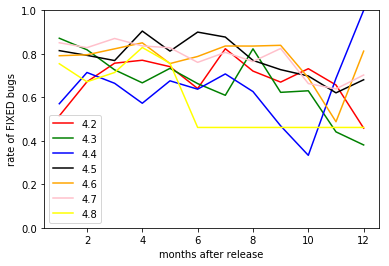

In [466]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\Aevol1.csv')
ci=0
colors=['red','green','blue','black','orange','pink','yellow']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    value.plot(kind='line',x='month',y='Ratio_R_A', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months after release')
plt.ylabel('rate of FIXED bugs')
plt.ylim(0, 1);
#plt.title('Resolving rate over months in any version just after a release of a version')
plt.savefig('rq1b.pdf')
plt.show()
